In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [136]:
df_races = pd.read_csv("./../data/clean/races_info_features.csv")
df_races.head()

,race,city,region,lat,lon,n_years_existance,entrants_count_avg,run_sinusoity,run_distance,run_elevationGain,...,swim_type,ironkids_race,wc_slots,distance_to_nearest_shoreline,n_metropolitan_cities,n_hotels,n_restaurants,n_nightlife,n_entertainment,n_shops
0,alagoas70.3,"Macei, Alagoas Brazil",South America,-9.661669,-35.701667,2.0,1184.00,4.617878,20880.8,219.2,...,ocean,0,0.0,1.391965,1,182,227,73,60,196
1,arizona,"Tempe, AZ",North America,33.433518,-111.937962,15.0,2916.75,9.242414,41597.4,178.5,...,lake,1,40.0,267.775462,5,283,239,245,210,249
2,Arizona70.3,"Tempe, Arizona",North America,33.432270,-111.932982,4.0,1738.00,7.081167,20812.2,101.4,...,river,0,0.0,267.865086,5,283,239,245,210,249
3,astana70.3,"Astana, Kazakhstan",Middle East,51.125358,71.453152,1.0,1086.00,7.975205,20643.3,81.3,...,river,1,0.0,1416.943720,1,76,58,39,26,124
4,atlanticcity70.3,"Atlantic City, New Jersey",North America,39.350119,-74.449387,3.0,2250.00,7.781190,20883.8,88.9,...,harbor,1,0.0,0.543229,23,238,244,248,179,138


In [140]:
regions_hash = {region: i for i,region in enumerate(df_races.region.unique())}
regions_hash

{'South America': 0,
 'North America': 1,
 'Middle East': 2,
 'Australia': 3,
 'Europe': 4,
 'Asia': 5,
 nan: 6,
 'Africa': 7}

In [141]:
swim_type_hash = {swimType: i for i,swimType in enumerate(df_races.swim_type.unique())}
swim_type_hash

{'ocean': 0, 'lake': 1, 'river': 2, 'harbor': 3}

In [167]:
df_test_performance = df_races[[
       'entrants_count_avg', 'run_sinusoity', 'run_distance',
       'run_elevationGain', 'run_score', 'bike_sinusoity', 'bike_distance',
       'bike_elevationGain', 'bike_score', 'swim_distance', 'swim_type',
       'wc_slots'
]]

df_test_vacation = df_races[[
       'ironkids_race', 'wc_slots', 'distance_to_nearest_shoreline',
       'n_metropolitan_cities', 'n_hotels', 'n_restaurants', 'n_nightlife',
       'n_entertainment', 'n_shops'
]]


df_test_performance.index = df_races.race
df_test_vacation.index = df_races.race

# convert strings to numbers
df_test_performance.loc[:, 'swim_type'] = df_test_performance.loc[:, 'swim_type'].apply(lambda x: swim_type_hash[x])

# fill na
df_test_performance = df_test_performance.fillna(df_test_performance.mean())
df_test_vacation = df_test_vacation.fillna(df_test_vacation.mean())

# # scale
# df_test_performance = df_test_performance - df_test_performance.mean()
# df_test_vacation = df_test_vacation - df_test_vacation.mean()


df_test_vacation.head()

/miniconda3/envs/data-science/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ironkids_race,wc_slots,distance_to_nearest_shoreline,n_metropolitan_cities,n_hotels,n_restaurants,n_nightlife,n_entertainment,n_shops
race,,,,,,,,,
alagoas70.3,0,0.0,1.391965,1,182,227,73,60,196
arizona,1,40.0,267.775462,5,283,239,245,210,249
Arizona70.3,0,0.0,267.865086,5,283,239,245,210,249
astana70.3,1,0.0,1416.943720,1,76,58,39,26,124
atlanticcity70.3,1,0.0,0.543229,23,238,244,248,179,138


In [ ]:
## Test correlation beween race size and something else, coastal, etc .... number of restaurant, etc ...

In [168]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities_performance = cosine_similarity(df_test_performance)
cosine_similarities_vacation = cosine_similarity(df_test_vacation)
cosine_similarities_performance

array([[1.        , 0.99998957, 0.99997168, ..., 0.99992907, 0.99983408,
        0.99999182],
       [0.99998957, 1.        , 0.99997639, ..., 0.99994662, 0.99987139,
        0.99998265],
       [0.99997168, 0.99997639, 1.        , ..., 0.99996037, 0.99990796,
        0.99998663],
       ...,
       [0.99992907, 0.99994662, 0.99996037, ..., 1.        , 0.99997781,
        0.99993311],
       [0.99983408, 0.99987139, 0.99990796, ..., 0.99997781, 1.        ,
        0.99985029],
       [0.99999182, 0.99998265, 0.99998663, ..., 0.99993311, 0.99985029,
        1.        ]])

In [190]:
df_results_performance = pd.DataFrame(cosine_similarities_performance, columns=df_test_performance.index, index=df_test_performance.index)
df_results_vacation = pd.DataFrame(cosine_similarities_vacation, columns=df_test_performance.index, index=df_test_performance.index)

race_to_check = 'florida'

ex = pd.concat([df_results_performance['boulder'], df_results_vacation['boulder']], axis=1)
ex.columns = ['vacation', 'performance']
ex.head(8)

,vacation,performance
race,,
alagoas70.3,0.999992,0.387439
arizona,0.999967,0.772739
Arizona70.3,0.999955,0.772507
astana70.3,0.999977,0.944822
atlanticcity70.3,0.999883,0.410802
augusta70.3,0.999738,0.731315
australia,0.999991,0.343248
austria,0.999973,0.607954


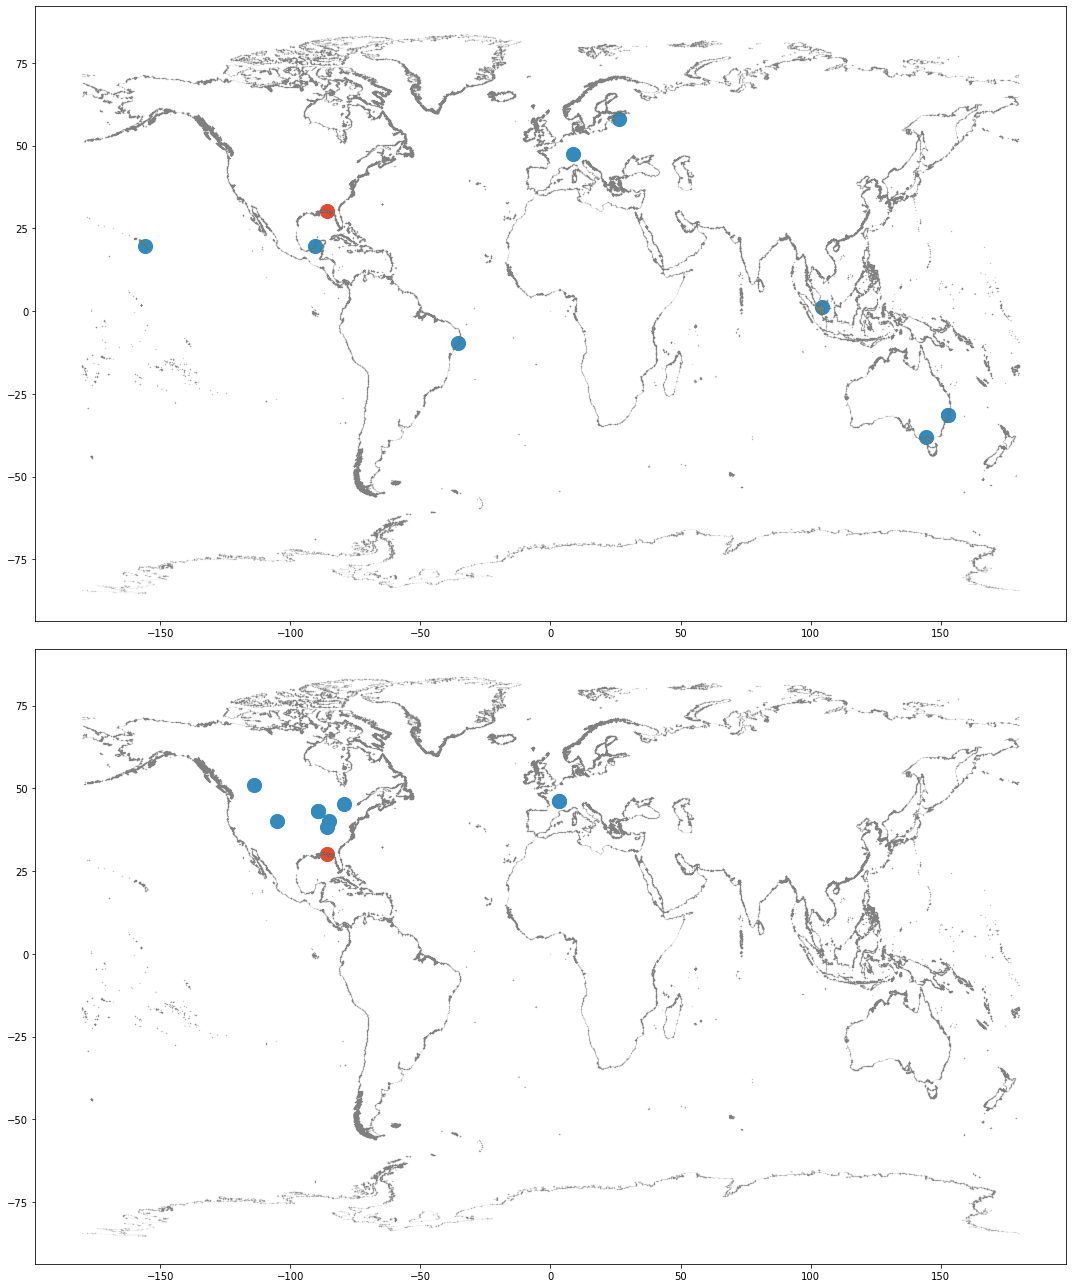

In [199]:
coast = pd.read_csv('./../data/geo-data/shorelines_lat_lon.csv')

fig,axes = plt.subplots(figsize=(15, 18), nrows=2)
axes = axes.ravel()

for i,ax in enumerate(axes):
    # coast
    ax.plot(coast.lon, coast.lat, '.', ms=0.05, color='gray')
    
    # the top 10 correlated
    series = ex.iloc[:, i].sort_values(ascending=False)
    for race in series.index[1:10]:
        lon,lat = df_races.loc[df_races.race==race, ['lon', 'lat']].values[0]
        ax.scatter(lon, lat, s=200, c='#348ABD')
    
    # race we are correlating the others
    lat,lon = df_races.loc[df_races.race == race_to_check, ['lat', 'lon']].values[0]
    ax.scatter(lon, lat, s=200, c='#E24A33')
    
fig.tight_layout()
fig.savefig("test-dif.png")

/miniconda3/envs/data-science/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


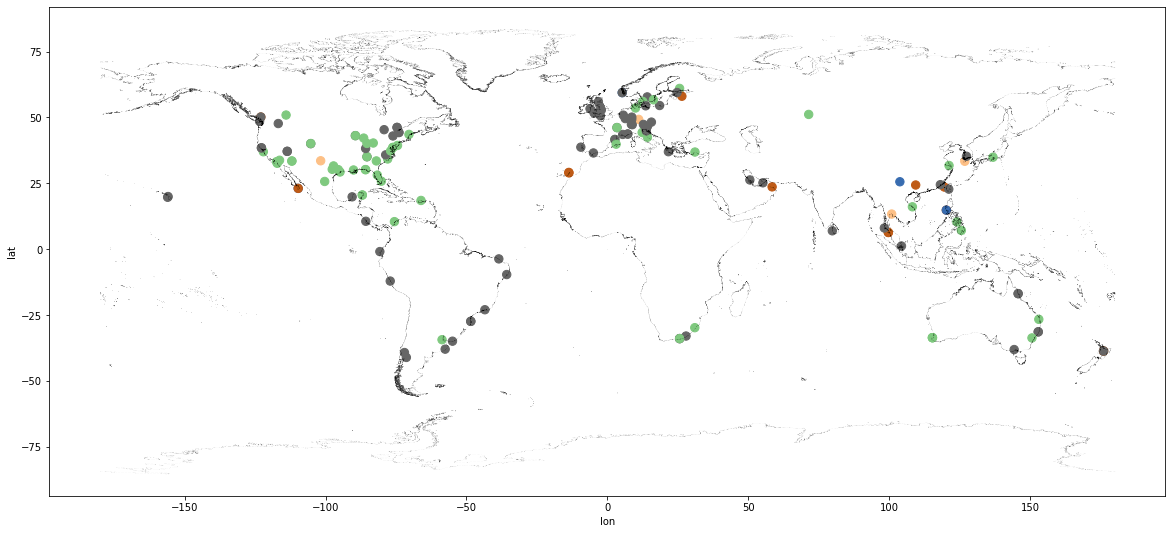

In [117]:
n_cluster = 5

from sklearn.cluster import SpectralClustering

# The algorithm takes the top k eigenvectors of the input matrix corresponding to the largest eigenvalues,
# then runs the k-mean algorithm on the new matrix.
clusters = SpectralClustering(n_cluster).fit_predict(cosine_similarities)

# # this would be equivalent
# from sklearn.cluster import KMeans
# eigen_values, eigen_vectors = np.linalg.eigh(cosine_similarities)
# clusters2 = KMeans(n_clusters=n_cluster, init='k-means++').fit_predict(eigen_vectors)

# pd.DataFrame({'spectral': clusters, 'kmeans': clusters2})


fig,ax = plt.subplots(figsize=(20, 9))
ax.plot(coast.lon, coast.lat, '.', ms=0.01, color='k')
ax.set_xlabel("lon")
ax.set_ylabel("lat")

ax.scatter(df_races.lon, df_races.lat, s=70, c = clusters, cmap="Accent")

Number of clusters: 17


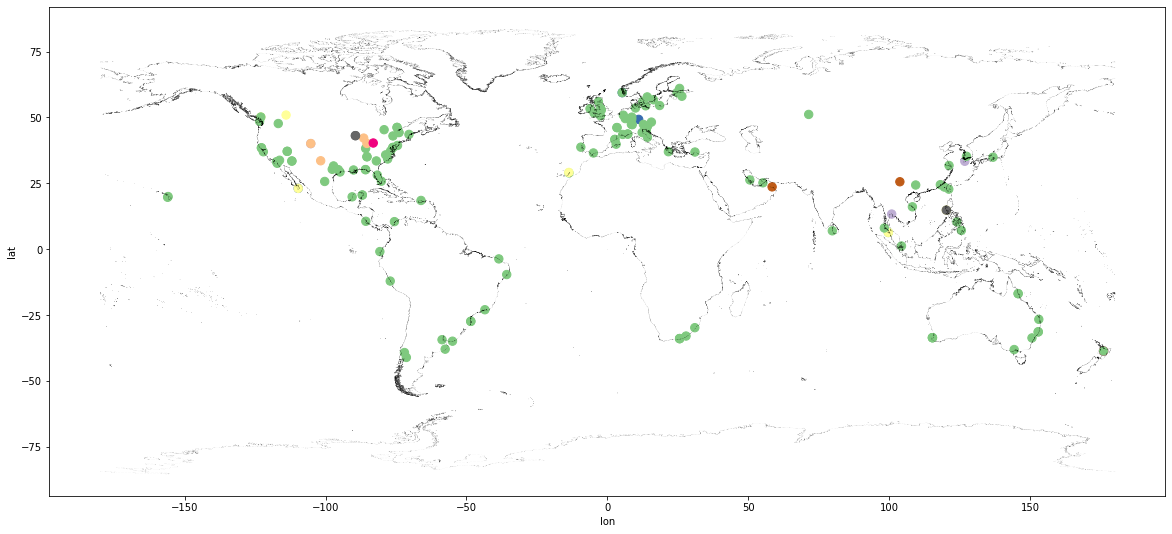

In [120]:
from sklearn.cluster import DBSCAN

# Let's try an algorithm to figure out the number of clusters by itself,
# we can use Density Based Clustering Algorithms like DBSCAN
clusters = DBSCAN(min_samples=1, eps=0.3).fit_predict(1-cosine_similarities)

print("Number of clusters:", len(np.unique(clusters)))

fig,ax = plt.subplots(figsize=(20, 9))
ax.plot(coast.lon, coast.lat, '.', ms=0.01, color='k')
ax.set_xlabel("lon")
ax.set_ylabel("lat")

ax.scatter(df_races.lon, df_races.lat, s=70, c = clusters, cmap="Accent")

In [41]:
from scipy.cluster import  hierarchy

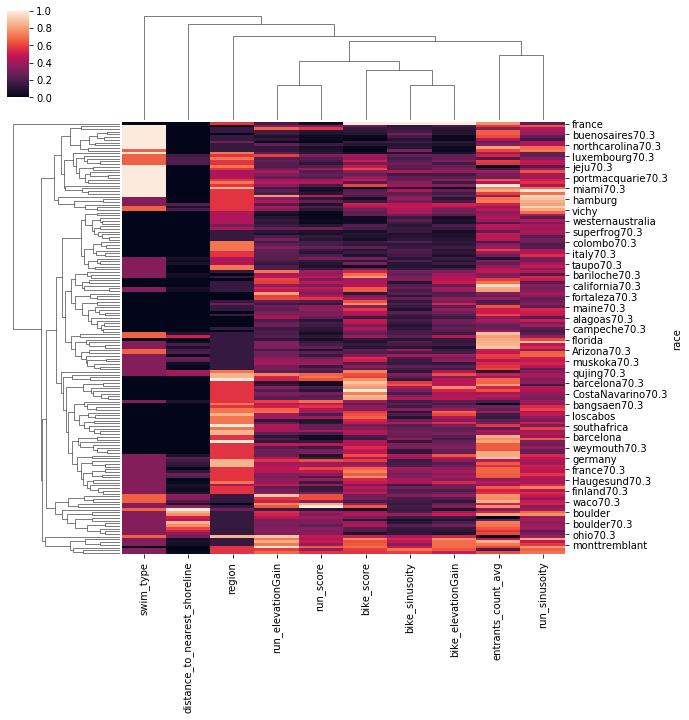

In [47]:
import seaborn as sns;

g = sns.clustermap(df_test/df_test.max())